<a href="https://colab.research.google.com/github/ihsanmauri/Telkom-Digital-Talent-Incubator/blob/master/Multi_Regresi_Pie_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisa Penjualan Pie dengan Regresi**

In [ ]:
# Import Packages
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model
import sklearn.metrics as sm

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')
sns.set(style='whitegrid')

In [ ]:
# Import Dataset
df = pd.read_csv ('https://raw.githubusercontent.com/ihsanmauri/Telkom-Digital-Talent-Incubator/master/Week%204/pie-sales.csv'
                  , sep =";")
print (df)

    week  pie_sales  price  advertising
0      1        350    5.5          3.3
1      2        460    7.5          3.3
2      3        350    8.0          3.0
3      4        430    8.0          4.5
4      5        350    6.8          3.0
5      6        380    7.5          4.0
6      7        430    4.5          3.0
7      8        470    6.4          3.7
8      9        450    7.0          3.5
9     10        490    5.0          4.0
10    11        340    7.2          3.5
11    12        300    7.9          3.2
12    13        440    5.9          4.0
13    14        450    5.0          3.5
14    15        300    7.0          2.7


In [ ]:
# Define the formula 
import statsmodels.formula.api as smf
model = smf.ols(formula='pie_sales ~ price + advertising', data=df)
results_formula = model.fit()
results_formula.params

Intercept      306.526193
price          -24.975090
advertising     74.130957
dtype: float64

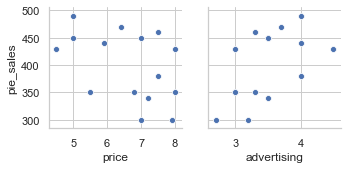

In [ ]:
# Plotting the Plot
sns.pairplot(
    df,
    x_vars=["price", "advertising"],
    y_vars=["pie_sales"],
)

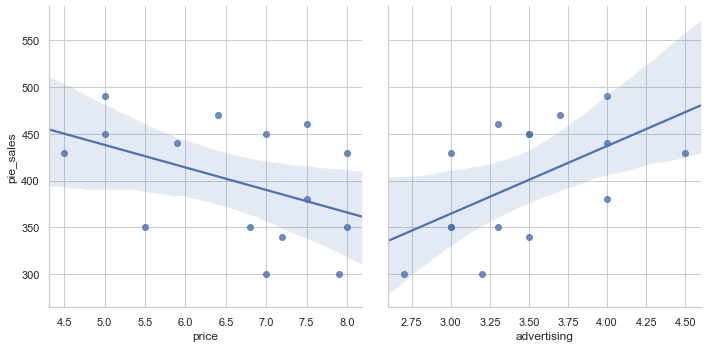

In [ ]:
# Visualize the scatterplot
g = sns.PairGrid(df, y_vars=["pie_sales"], x_vars=["price", "advertising"], height=5)
g.map(sns.regplot)

# Penjelasan Grafik:
Terlihat bahwa grafik pie_sales terhadap price mempunyai korelasi yang negatif, dimana ketika pie_sales meningkat 
jumlahnya price akan semakin turun
Sedangkan untuk pie_sales terhadap advertising, korelasinya bernilai positif, karena ketika pie_sales naik maka nilai 
advertising juga ikut naik

In [ ]:
X = sm.add_constant(X) # adding a constant

In [ ]:
# Calculation
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Sun, 18 Oct 2020   Prob (F-statistic):             0.0120
Time:                        13:19:03   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

In [ ]:
# Penjelasan:

-Uji Model/ koefisien determinasi
Pada tabel ditunjukkan bahwa untuk Adj. R-squared bernilai 0.442.
Jadi, sebanyak 44.2% untuk pie_sales dipengaruhi oleh price dan advertising,
sisanya 55.8% dapat dipengaruhi oleh sebab lain

-Penentuan Model Regresi:
Berdasarkan hasil perhitungan:
Intercept      306.526193
price          -24.975090
advertising     74.130957
Dapat dikatakan bahwa model regresi untuk kasus ini adalah:
Sales = 306.526 - 24.975 (price) + 74.131 (advertising)

-Uji F atau ANOVA
F tabel = (k; n-k) > (2; 13) = 3.81
k: jumlah variabel x
n: jumlah sampel
Dikarenakan F hitung (6.539) > F tabel (3.81),
artinya model dapat diterima

-Uji T
df = n-2 = 15-2 = 13
Tingkat kepercayaan dibagi 2 karena two tail = 0.025
Didapat T-tabel = 2.16037/ -2.16037
Sedangkan T-test untuk masing2 variabel adalah:
Price = -2.306
Advertising = 2.855
Jadi, kedua variabel dapat dikatakan memiliki pengaruh terhadap pie_sales

-P value
Nilai p untuk masing2 variabel adalah sebagai berikut:
price = 0.040
advertising = 0.014
Dikarenakan nilai p < tingkat kepercayaan, maka ada pengaruh price dan advertising terhadap pie_sales

-Confidence Interval
Dari tabel didapat bahwa untuk batas bawah dan atas dari tiap variabel price dan advertising adalah:
-48.576 dan -1.374
17.553 dan 130.709
Jadi dengan level confidence 95%, rata2 pengaruh kepada pie_sales untuk price diantara -48.6 USD dan -1.4 USD sedangkan
untuk advertising adalah 1755.3 USD dan 13070.9 (advertising dalam $100)

-Tes Autokorelasi Positif
Dengan n = 15 dan k = 2,
maka dL = 0.9455 dan dU = 1.5432
Karena nilai Durbin-Watson hitung bernilai 1.683, maka dalam kasus tersebut tidak terdapat autokorelasi


# **# Penjelasan:**

### Uji Model/ koefisien determinasi
Pada tabel ditunjukkan bahwa untuk Adj. R-squared bernilai 0.442.
Jadi, sebanyak 44.2% untuk pie_sales dipengaruhi oleh price dan advertising,
sisanya 55.8% dapat dipengaruhi oleh sebab lain

### Penentuan Model Regresi:
Berdasarkan hasil perhitungan:
Intercept      306.526193
price          -24.975090
advertising     74.130957
Dapat dikatakan bahwa model regresi untuk kasus ini adalah:
Sales = 306.526 - 24.975 (price) + 74.131 (advertising)

### Uji F atau ANOVA
F tabel = (k; n-k) > (2; 13) = 3.81
k: jumlah variabel x
n: jumlah sampel
Dikarenakan F hitung (6.539) > F tabel (3.81),
artinya model dapat diterima

### Uji T
df = n-2 = 15-2 = 13
Tingkat kepercayaan dibagi 2 karena two tail = 0.025
Didapat T-tabel = 2.16037/ -2.16037
Sedangkan T-test untuk masing2 variabel adalah:
Price = -2.306
Advertising = 2.855
Jadi, kedua variabel dapat dikatakan memiliki pengaruh terhadap pie_sales

### P value
Nilai p untuk masing2 variabel adalah sebagai berikut:
price = 0.040
advertising = 0.014
Dikarenakan nilai p < tingkat kepercayaan, maka ada pengaruh price dan advertising terhadap pie_sales

### Confidence Interval
Dari tabel didapat bahwa untuk batas bawah dan atas dari tiap variabel price dan advertising adalah:
-48.576 dan -1.374
17.553 dan 130.709
Jadi dengan level confidence 95%, rata2 pengaruh kepada pie_sales untuk price diantara -48.6 USD dan -1.4 USD sedangkan
untuk advertising adalah 1755.3 USD dan 13070.9 (advertising dalam $100)

### Tes Autokorelasi Positif
Dengan n = 15 dan k = 2,
maka dL = 0.9455 dan dU = 1.5432
Karena nilai Durbin-Watson hitung bernilai 1.683, maka dalam kasus tersebut tidak terdapat autokorelasi
